In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import random





In [5]:
dataset = pd.read_csv("headbrain.csv")
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [167]:
#dividing the data into training and testing data
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3,random_state = 2)
x_train = x_train.reshape(165,1)
y_train = y_train.reshape(165,1)
x_train  = np.c_[np.ones(len(x_train)),x_train]
# print(x_train)

[0.84558824 0.50294118 0.55882353 0.48088235 0.93382353 0.50735294
 0.65441176 0.44117647 0.58823529 0.61764706 0.56617647 0.625
 0.58823529 0.83382353 0.37205882 0.66176471 0.59264706 0.49558824
 0.56617647 0.65441176 0.59117647 0.48823529 0.47058824 0.46323529
 1.         0.80882353 0.78676471 0.77941176 0.52205882 0.68382353
 0.53382353 0.70147059 0.60147059 0.66176471 0.70147059 0.37058824
 0.61764706 0.58088235 0.41323529 0.43382353 0.58088235 0.53676471
 0.83823529 0.90441176 0.56617647 0.68676471 0.81029412 0.38235294
 0.52352941 0.50735294 0.39558824 0.58088235 0.55882353 0.63970588
 0.65441176 0.39705882 0.52205882 0.88970588 0.55147059 0.39264706
 0.67647059 0.32352941 0.55147059 0.77941176 0.75735294 0.26470588
 0.52205882 0.29264706 0.81617647 0.67647059 0.75441176 0.63970588
 0.625      0.70147059 0.41911765 0.35294118 0.39705882 0.34264706
 0.43676471 0.52941176 0.42647059 0.69852941 0.47647059 0.42647059
 0.52058824 0.67205882 0.24264706 0.38970588 0.47794118 0.71323529


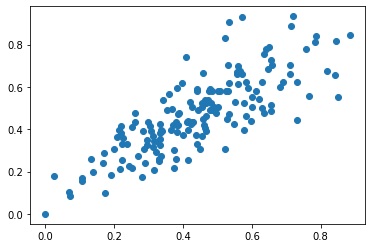

In [67]:
plt.plot(x_train, y_train, 'o')
plt.show()

In [168]:
iter = 2
theta = np.zeros(2).reshape(2,1)
alpha = 0.1

n = len(x_train)
theta.shape


(2, 1)

In [170]:

for i in range(iter):
    Y_pred = x_train.dot(theta)
    s = (y_train - Y_pred).T.dot(x_train)
    print((s.shape))
    print(Y_pred.shape)
    print(y_train.shape)
    print(x_train.shape)
#     print(np.sum((y_train - Y_pred) ** 2))
    d = (-1 / n) * ((y_train - Y_pred).T.dot(x_train))
    print(d)
#     dc = (-1 / n) * np.sum(y_train - Y_pred)  
#     print(dm, dc)
    theta = theta - alpha * d  
#     print(m,c)

    Y_pred =  x_train.dot(theta)

# print(Y_pred)

(1, 2)
(165, 1)
(165, 1)
(165, 2)
[[-0.28909734 -0.14987557]]
(2, 2)
(165, 2)
(165, 1)
(165, 2)
[[-0.24739594 -0.13049715]
 [-0.26747825 -0.13982929]]


ValueError: x and y must be the same size

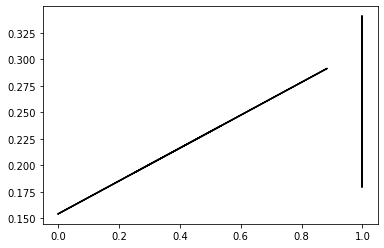

In [171]:
plt.plot(x_train,Y_pred,label = "predicted",color = "black")
plt.scatter(x_train,y_train,label = "actual")
plt.legend()
plt.show()

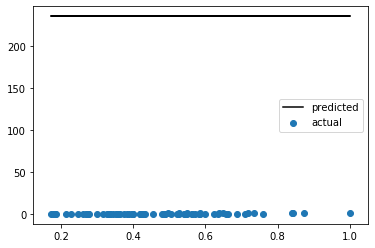

In [127]:
h_theta = x_test * m + c
plt.plot(x_test,h_theta,label = "predicted",color = "black")
plt.scatter(x_test,y_test,label = "actual")
plt.legend()
plt.show()

In [34]:
n = len(x_test)
rmse = np.sqrt((np.sum(y_test - h_theta) ** 2) / n)
rss = np.sum((y_test - h_theta) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
rs = 1 - (rss / tss)
print("Testing Accuracy : \n","RSS :",rss,"\nRMSE: ",rmse)

Testing Accuracy : 
 RSS : 0.7230754172172472 
RMSE:  0.11601101959568105
